<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/seasonaldecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 36.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
##MA method
#3tryusing MA for getting the trend of the time series
##basically a trailing MA is used for MA forecasting - 
import yfinance as yf

In [ ]:
df = yf.download(tickers = 'AAPL', start = '2013-09-09', end = '2020-09-09')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-09,18.035713,18.139999,17.981428,18.077499,15.936427,340687200
2013-09-10,18.078571,18.123215,17.482143,17.665714,15.573405,743195600
2013-09-11,16.678928,16.917500,16.600357,16.703930,14.725537,898696400
2013-09-12,16.732143,16.978571,16.643213,16.881786,14.882332,404051200
2013-09-13,16.762142,16.851070,16.596430,16.603571,14.637065,298835600
...,...,...,...,...,...,...
2020-09-01,132.759995,134.800003,130.529999,134.179993,133.128204,151948100
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.369995,200119000
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.932457,257599600


In [ ]:
df1 = df.resample('M').last().rename(columns={'Adj Close': 'adj_close'}).adj_close 
df1
##unnecessarily saving lines

Date
2013-09-30     15.010157
2013-10-31     16.456863
2013-11-30     17.609709
2013-12-31     17.766468
2014-01-31     15.853075
                 ...    
2020-05-31     78.720009
2020-06-30     90.322258
2020-07-31    105.237312
2020-08-31    128.028488
2020-09-30    111.935631
Freq: M, Name: adj_close, Length: 85, dtype: float64

In [ ]:
df2 = df.resample('M').last()
df2
#new functionality - ntg special
##basically takes end of month price
##we can also use .sum - this thing works only in datetime index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-30,17.044643,17.202143,16.943214,17.026787,15.010157,260156400
2013-10-31,18.750000,18.838928,18.616785,18.667856,16.456863,275696400
2013-11-30,19.624287,19.940357,19.564644,19.859644,17.609709,318127600
2013-12-31,19.791786,20.045713,19.785713,20.036428,17.766468,223084400
2014-01-31,17.684999,17.911785,17.626785,17.878571,15.853075,464797200
...,...,...,...,...,...,...
2020-05-31,79.812500,80.287498,79.117500,79.485001,78.720009,153532400
2020-06-30,90.019997,91.495003,90.000000,91.199997,90.322258,140223200
2020-07-31,102.885002,106.415001,100.824997,106.260002,105.237312,374336800


In [ ]:
df2 = df2.loc[:,['Adj Close']]

In [ ]:
df2.rename(columns = {'Adj Close':'adj_close'})
df2

,Adj Close
Date,
2013-09-30,15.010157
2013-10-31,16.456863
2013-11-30,17.609709
2013-12-31,17.766468
2014-01-31,15.853075
...,...
2020-05-31,78.720009
2020-06-30,90.322258
2020-07-31,105.237312


train_indices = goog.index.year < 2018
goog_train = goog[train_indices]
goog_test = goog[~train_indices]

test_length = len(goog_test)

basically the train - test split


In [ ]:
train_index = df.index.year < 2018
train_index


array([ True,  True,  True, ..., False, False, False])

In [ ]:
df_train = df.loc[train_index]
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-09,18.035713,18.139999,17.981428,18.077499,15.936427,340687200
2013-09-10,18.078571,18.123215,17.482143,17.665714,15.573405,743195600
2013-09-11,16.678928,16.917500,16.600357,16.703930,14.725537,898696400
2013-09-12,16.732143,16.978571,16.643213,16.881786,14.882332,404051200
2013-09-13,16.762142,16.851070,16.596430,16.603571,14.637065,298835600
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.845699,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.784077,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.791260,85992800


In [ ]:
df_train = df_train.loc[:,['Adj Close']]
df_train 

,Adj Close
Date,
2013-09-09,15.936427
2013-09-10,15.573405
2013-09-11,14.725537
2013-09-12,14.882332
2013-09-13,14.637065
...,...
2017-12-22,41.845699
2017-12-26,40.784077
2017-12-27,40.791260


In [ ]:
test_index = ~train_index
test_index
##use tilde to complement the truth value array

array([False, False, False, ...,  True,  True,  True])

In [ ]:
df_Test = df.loc[test_index]

In [ ]:
df_Test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.188168,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.180992,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.372276,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.843307,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.687893,82271200
...,...,...,...,...,...,...
2020-09-01,132.759995,134.800003,130.529999,134.179993,133.128204,151948100
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.369995,200119000
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.932457,257599600


In [ ]:
#def mean(a, n):
#  if len(a) == n :


In [ ]:
df_train['mean_notdelayed'] = df['Adj Close'].rolling(5).mean()

In [ ]:
df_test = df_Test

In [ ]:
df_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.188168,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.180992,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.372276,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.843307,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.687893,82271200
...,...,...,...,...,...,...
2020-09-01,132.759995,134.800003,130.529999,134.179993,133.128204,151948100
2020-09-02,137.589996,137.979996,127.000000,131.399994,130.369995,200119000
2020-09-03,126.910004,128.839996,120.500000,120.879997,119.932457,257599600


In [ ]:
d1 = df_train['mean_notdelayed']
d1.dropna(inplace = True)
d2 = []
d2.append(0)

In [ ]:
for i in range(len(d1)):
  d2.append(d1[i])

In [ ]:
d2

[0,
 15.15095329284668,
 14.798013877868652,
 14.550423049926758,
 14.531344032287597,
 14.528887748718262,
 14.544694328308106,
 14.799842643737794,
 15.012549209594727,
 15.118650817871094,
 15.206302833557128,
 15.302896118164062,
 15.215433120727539,
 15.208256149291993,
 15.258820343017579,
 15.241126823425294,
 15.242889976501464,
 15.31215534210205,
 15.267950820922852,
 15.249250030517578,
 15.288479423522949,
 15.350062370300293,
 15.402263641357422,
 15.513970184326173,
 15.605399894714356,
 15.698971176147461,
 15.800224685668946,
 15.959662437438965,
 16.09309329986572,
 16.243273544311524,
 16.41587142944336,
 16.52335968017578,
 16.577007293701172,
 16.556919479370116,
 16.556541442871094,
 16.498546981811522,
 16.461205291748048,
 16.441496658325196,
 16.49672050476074,
 16.490810012817384,
 16.445360565185545,
 16.467836761474608,
 16.4384334564209,
 16.42329635620117,
 16.4214599609375,
 16.52070846557617,
 16.54876708984375,
 16.54610710144043,
 16.54319534301758,
 16

In [ ]:
d2[len(d2) - 1]

40.95814666748047

In [ ]:
##right so moving avg forecastnig - is pretty bad - ignore it lol

In [ ]:
#https://youtu.be/Fqge2HDH2Co - helps in this stuff


In [ ]:
##SES

In [ ]:
## smipleedxponential smoothing
##again - its only used to forecast a single value

In [ ]:
##this is used for cases when the timeseries doesnt have trend or seasonality
##same was the case for the moving average forecaster

In [ ]:
##our forecasted value is the level
##The k step ahead forecasted value is the current level value
##we get level y using level updating eqn
##alpha times Yt + (1-alpha)*Lt-1

In [ ]:
##typical values of alpha arecloser to 0.1 or 0.2 - software defaults as well

In [ ]:
##Ft+1 = Ft + alpha* et
##et = Yt-Ft - error in the previous forecast
import pandas as pd

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download(tickers = 'AAPL', start = '2013-09-09', end = '2021-09-09')
df = df.loc[:,['Adj Close']]
df['price_diff'] = df['Adj Close'] - df['Adj Close'].shift(1)
df.dropna(inplace = True)
#results in a stationary data

[*********************100%***********************]  1 of 1 completed


In [ ]:
 # dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt

In [ ]:
df = yf.download(tickers= 'AAPL', start = '2013-09-09', end = '2017-09-09')
df = df.loc[:,['Adj Close']]
df.rename(columns = {'Adj Close':'price'}, inplace = True)
df = df.resample('M').last()

[*********************100%***********************]  1 of 1 completed


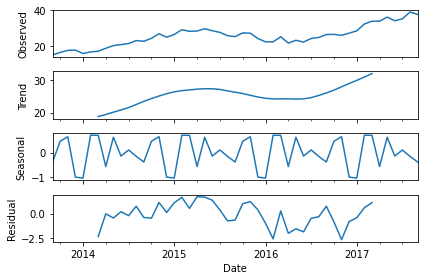

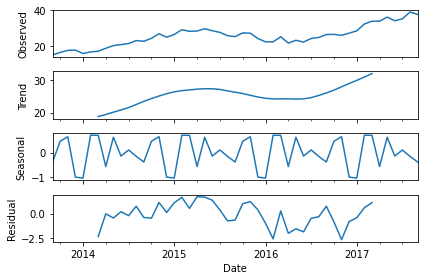

In [ ]:
abc = seasonal_decompose(df['price'], model = 'Multiplicative')
abc.plot()

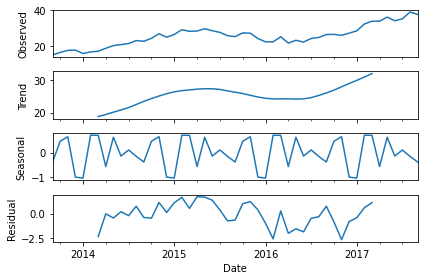

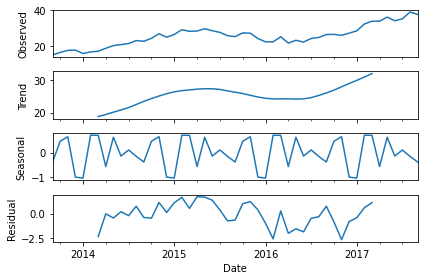

In [ ]:
abc = seasonal_decompose(df['price'], model = 'Additive')
abc.plot()

In [ ]:
##there is no difference !!!

In [ ]:
??ExponentialSmoothing
##the "mul" stands for multiplicative

In [ ]:
index_train = df.index.year < 2017

In [ ]:
index_test = ~index_train

In [ ]:
df_test = df.loc[index_test]
df_train = df.loc[index_train]

In [ ]:
df_test

,price
Date,
2017-01-31,28.556137
2017-02-28,32.376316
2017-03-31,33.952705
2017-04-30,33.950340
2017-05-31,36.252426
2017-06-30,34.178280
2017-07-31,35.296047
2017-08-31,39.072701
2017-09-30,37.793308


In [ ]:
df_train

,price
Date,
2013-09-30,15.010160
2013-10-31,16.456861
2013-11-30,17.609711
2013-12-31,17.766474
2014-01-31,15.853080
2014-02-28,16.764807
2014-03-31,17.099310
2014-04-30,18.798922
2014-05-31,20.278572


In [ ]:
??ExponentialSmoothing

In [ ]:
abc = ExponentialSmoothing(df_test, trend = None, damped = False, seasonal = False)
#abc_forecast = abc.forecast(len(df_test))

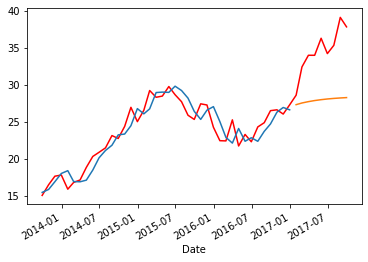

In [ ]:
hs_4 = Holt(df_train, exponential = True, damped = True).fit(damping_slope = 0.8)
##nnote since seasonality has not been included hence why its probably jst flattening out since the peak 
##and fall have completely compensated each other ig


hs_forecast_4 = hs_4.forecast(len(df_test))
##bruhh the thing is not taking seasonality argument lets take damping
plt.plot(df, color = 'r')
hs_4.fittedvalues.plot()
hs_forecast_4.plot()

In [ ]:
fitted_model = ExponentialSmoothing(df_train['price'],trend="mul",seasonal="mul").fit()
test_predictions = fitted_model.forecast(len(df_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


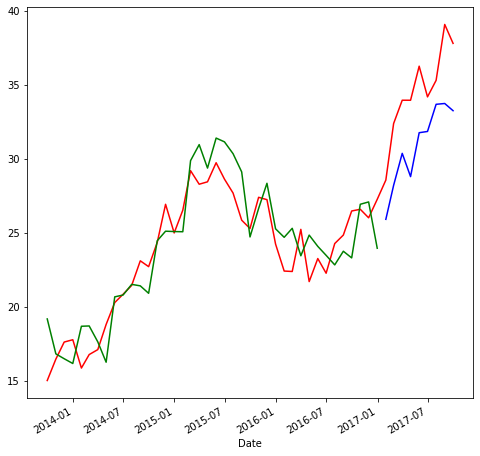

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(df, color = 'r')
fitted_model.fittedvalues.plot(color = 'g')
test_predictions.plot(color = 'b')

In [ ]:
df = yf.download(tickers = 'AAPL', start = '1990-01-01', end = '2019-01-01')
df = df.loc[:,['Adj Close']]
df.rename(columns = {'Adj Close':'price'}, inplace = True)
df = df.resample('M').last()

[*********************100%***********************]  1 of 1 completed


In [ ]:
index_train = df.index.year < 2017
df_train = df.loc[index_train]
df_test = df.loc[~index_train]
df_test

,price
Date,
2017-01-31,28.556139
2017-02-28,32.376312
2017-03-31,33.952705
2017-04-30,33.950336
2017-05-31,36.252426
2017-06-30,34.178288
2017-07-31,35.296040
2017-08-31,39.072701
2017-09-30,36.718803


In [ ]:
df_train

,price
Date,
1990-01-31,0.243178
1990-02-28,0.243962
1990-03-31,0.288808
1990-04-30,0.282530
1990-05-31,0.296805
...,...
2016-08-31,24.839966
2016-09-30,26.467096
2016-10-31,26.581810


In [ ]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fitted_model = ExponentialSmoothing(df_train,trend="mul",seasonal="mul").fit()
test_predictions = fitted_model.forecast(len(df_test))
##why is it only taking month as its frequency

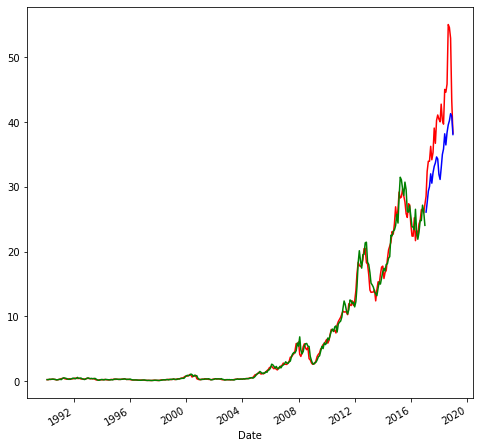

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(df, color = 'r')
fitted_model.fittedvalues.plot(color = 'g')
test_predictions.plot(color = 'b')
##basically can be used to forecast peaks and troughs statistically and objectively as well
##need to see how efficient this thing actually is
##need to also check out the seasonality - and which industries rise and fall
##also if the seasonality is out of phase can i say that they are negatively correlated